Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcardfraud.csv')

In [ ]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8761,11926,0.224210,0.730182,0.536568,-0.297833,0.529837,0.008517,-0.153646,-0.778260,1.143360,...,0.311157,-1.489044,-0.207238,-0.991151,0.504758,0.005972,0.092759,0.213102,1.99,0.0
8762,11928,-0.777982,1.247878,1.106014,1.421211,-0.087339,0.044765,0.039896,0.547840,0.752861,...,-0.144915,-0.084414,-0.150048,-0.063168,-0.039265,-0.283939,0.250660,0.110168,12.99,0.0
8763,11930,1.297487,-0.202241,0.043946,0.094497,-0.057158,0.099204,-0.280711,-0.127515,2.168290,...,-0.338119,-0.551489,-0.248950,-0.964184,0.592470,1.156197,-0.102371,-0.014854,39.98,0.0
8764,11932,-1.093189,0.157400,2.048652,-0.860421,0.235073,-0.167494,0.636240,-0.205278,1.507648,...,-0.255789,-0.233994,-0.451409,0.018927,0.377757,0.958870,-0.297683,-0.246392,80.50,0.0
8765,11932,-2.594443,-0.991587,1.957468,1.705635,-0.182961,0.095771,-0.281082,0.642498,1.001348,...,0.353258,0.501825,0.292150,0.060489,0.453079,-0.142001,0.183807,-0.143522,NaN,NaN


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8766 entries, 0 to 8765
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    8766 non-null   int64  
 1   V1      8766 non-null   float64
 2   V2      8766 non-null   float64
 3   V3      8766 non-null   float64
 4   V4      8766 non-null   float64
 5   V5      8766 non-null   float64
 6   V6      8766 non-null   float64
 7   V7      8766 non-null   float64
 8   V8      8766 non-null   float64
 9   V9      8766 non-null   float64
 10  V10     8766 non-null   float64
 11  V11     8766 non-null   float64
 12  V12     8766 non-null   float64
 13  V13     8766 non-null   float64
 14  V14     8766 non-null   float64
 15  V15     8766 non-null   float64
 16  V16     8766 non-null   float64
 17  V17     8766 non-null   float64
 18  V18     8766 non-null   float64
 19  V19     8766 non-null   float64
 20  V20     8766 non-null   float64
 21  V21     8766 non-null   float64
 22  

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    8735
1.0      30
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(8735, 31)
(30, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    8735.000000
mean       63.703021
std       189.290575
min         0.000000
25%         5.000000
50%        15.950000
75%        52.520000
max      7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      30.000000
mean       88.757000
std       341.372542
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,4882.544820,-0.259336,0.266048,0.925581,0.200324,-0.032140,0.135860,-0.037305,-0.075399,0.737494,...,0.034879,-0.057467,-0.157840,-0.037685,0.026254,0.089180,0.073536,0.009300,0.001242,63.703021
1.0,8018.266667,-1.166570,3.286696,-5.482274,5.085269,-0.719672,-2.080676,-2.767707,0.807816,-1.990289,...,0.394607,0.519188,-0.241668,-0.129442,-0.284319,0.116275,0.307045,0.589117,0.306852,88.757000


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5027,4636,0.664729,-0.638774,-0.258216,1.243438,0.194268,0.690724,0.196727,0.072999,1.181640,...,-0.159994,-0.921783,-0.310798,-1.251307,0.350796,-0.517858,-0.060657,0.042954,296.44,0.0
4897,4431,1.159266,-0.068184,0.522080,1.340043,0.178743,1.401810,-0.632770,0.350461,2.064474,...,-0.273400,-0.235403,-0.236655,-1.368112,0.718796,-0.229859,0.036269,-0.007499,15.00,0.0
5871,6398,-2.380210,-0.266473,1.090077,0.853215,3.371780,3.790719,-1.123674,0.941963,1.236974,...,-0.306571,-0.514617,-0.443708,0.962374,0.088245,-0.280859,-0.635895,0.616903,0.00,0.0
6023,6781,0.946724,-0.811320,0.265932,-0.817474,-0.980097,-0.981556,0.001164,-0.364284,2.911724,...,-0.122531,-0.137021,-0.276956,0.424674,0.619433,-0.002015,-0.038106,0.037535,187.14,0.0
1993,1531,-2.844709,2.734210,-0.499037,-1.034623,-0.776265,-0.668750,-0.356853,1.313071,0.591929,...,-0.289244,-0.643686,0.027395,-0.432674,0.296821,0.376164,0.556133,0.352268,1.00,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8296,11080,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,...,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1.0,1.0
8312,11092,0.378275,3.914797,-5.726872,6.094141,1.698875,-2.807314,-0.591118,-0.123496,-2.530713,...,0.149896,-0.601967,-0.613724,-0.403114,1.568445,0.521884,0.527938,0.411910,1.0,1.0
8335,11131,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,...,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,1.0,1.0
8615,11629,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,...,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,1.0,1.0
8617,11635,0.919137,4.199633,-7.535607,7.426940,1.118215,-2.886722,-1.341036,0.363933,-2.203224,...,0.316094,0.055179,0.210692,-0.417918,-0.911188,0.466524,0.627393,0.157851,1.0,1.0


In [ ]:
new_dataset['Class'].value_counts()

0.0    492
1.0     30
Name: Class, dtype: int64

<Axes: >

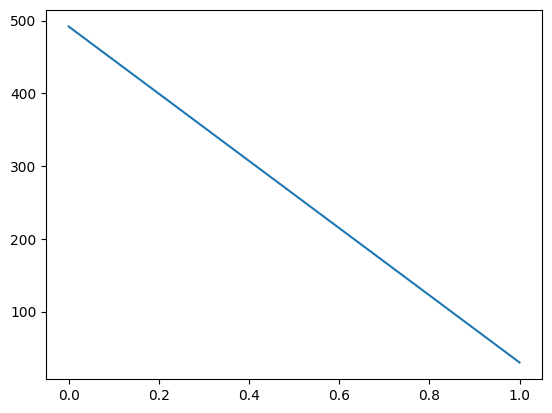

In [ ]:
pd.value_counts(new_dataset['Class']).plot()

<Axes: >

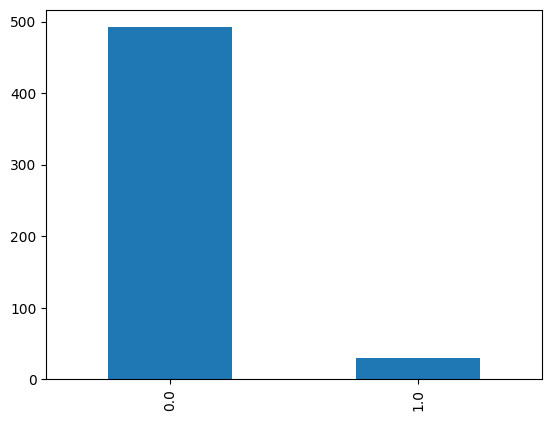

In [ ]:
pd.value_counts(new_dataset['Class']).plot.bar()

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,5008.371951,-0.188386,0.312610,0.904809,0.303082,0.038153,0.220250,0.002477,0.002273,0.755946,...,0.032462,-0.034325,-0.187486,-0.054760,0.062643,0.097595,0.064804,0.023029,0.000679,63.249207
1.0,8018.266667,-1.166570,3.286696,-5.482274,5.085269,-0.719672,-2.080676,-2.767707,0.807816,-1.990289,...,0.394607,0.519188,-0.241668,-0.129442,-0.284319,0.116275,0.307045,0.589117,0.306852,88.757000


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

       Time        V1        V2         V3        V4        V5        V6  \
5027   4636  0.664729 -0.638774  -0.258216  1.243438  0.194268  0.690724   
4897   4431  1.159266 -0.068184   0.522080  1.340043  0.178743  1.401810   
5871   6398 -2.380210 -0.266473   1.090077  0.853215  3.371780  3.790719   
6023   6781  0.946724 -0.811320   0.265932 -0.817474 -0.980097 -0.981556   
1993   1531 -2.844709  2.734210  -0.499037 -1.034623 -0.776265 -0.668750   
...     ...       ...       ...        ...       ...       ...       ...   
8296  11080 -2.125490  5.973556 -11.034727  9.007147 -1.689451 -2.854415   
8312  11092  0.378275  3.914797  -5.726872  6.094141  1.698875 -2.807314   
8335  11131 -1.426623  4.141986  -9.804103  6.666273 -4.749527 -2.073129   
8615  11629 -3.891192  7.098916 -11.426467  8.607557 -2.065706 -2.985288   
8617  11635  0.919137  4.199633  -7.535607  7.426940  1.118215 -2.886722   

             V7        V8        V9  ...       V20       V21       V22  \
5027   0.1967

In [ ]:
print(Y)

5027    0.0
4897    0.0
5871    0.0
6023    0.0
1993    0.0
       ... 
8296    1.0
8312    1.0
8335    1.0
8615    1.0
8617    1.0
Name: Class, Length: 522, dtype: float64


Split the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(522, 30) (417, 30) (105, 30)


Model Training

Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  1.0
